<img src="https://bit.ly/2VnXWr2" width="80" align="left"/>

*Ironhack Data Analytics Bootcamp*

<BR>

Mini Project – **Estimate df_hist prices with Linear Regression**
<br>
<br>
Authors:
<br>
[Felipe Altermann](https://www.linkedin.com/in/felipealtermann/)
<br>
[Natália Ceoldo](missing_link)
<br>
October 2021
<br>
<br>

# The anatomy of a diamond

<img src="https://www.aaajewelryutah.com/wp-content/uploads/2017/01/anatomy-of-diamond.gif" width="450" align="left"/>

[Image source](https://www.aaajewelryutah.com/)

# Data source

* Given Dataset in CSV format (approximately 54k rows and 11 different columns)

* The following codebook was provided together with the dataset to clarify what each column represents:

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Challange

* Work with data to understand the characteristics of a diamond that are most likely to influence its price.


## How to define value for a Diamond?

* With the 4Cs, a grading system invented in the 1940s by a gem research institute named [*'GIA'*](https://4cs.gia.edu/en-us/blog/history-4cs-diamond-quality/).

*The 4Cs — color, clarity, cut and carat weight — are the globally accepted standards for assessing the quality of a diamond.* [Source: Tiffany](https://www.tiffany.com/engagement/the-tiffany-guide-to-df_hist/)

* So, a diamond should be:
    - either colorless or a bright color, but not in between;
    - clear;
    - cut not too flat, not too deep;
    - big.

## Data Analysis – exploring dataset

In [1]:
# import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [3]:
# read diamonds .csv file and transform into a data frame

In [4]:
df_hist = pd.read_csv('diamonds.csv', sep=',')

In [5]:
df_hist

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [6]:
# check if there are any null values
df_hist.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df_hist.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# there are zero values in the 'min' values, what is suspicious

In [9]:
df_hist.loc[(df_hist['x'] == 0) | (df_hist['y'] == 0) | (df_hist['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(df_hist.loc[(df_hist['x'] == 0) | (df_hist['y'] == 0) | (df_hist['z'] == 0)])

18

In [11]:
# drop this 18 lines

In [12]:
df_hist = df_hist[(df_hist[['x', 'y', 'z']] != 0).all(axis = 1)].reset_index()
df_hist = df_hist.drop('index', axis=1)

In [13]:
df_hist.shape

(48922, 10)

In [14]:
df_hist.describe()

,carat,depth,table,price,x,y,z
count,48922.000000,48922.000000,48922.000000,48922.000000,48922.000000,48922.000000,48922.000000
mean,0.797555,61.752073,57.450856,3932.350660,5.731132,5.734633,3.539950
std,0.473880,1.429728,2.232974,3986.887437,1.119630,1.143415,0.703679
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Correlation

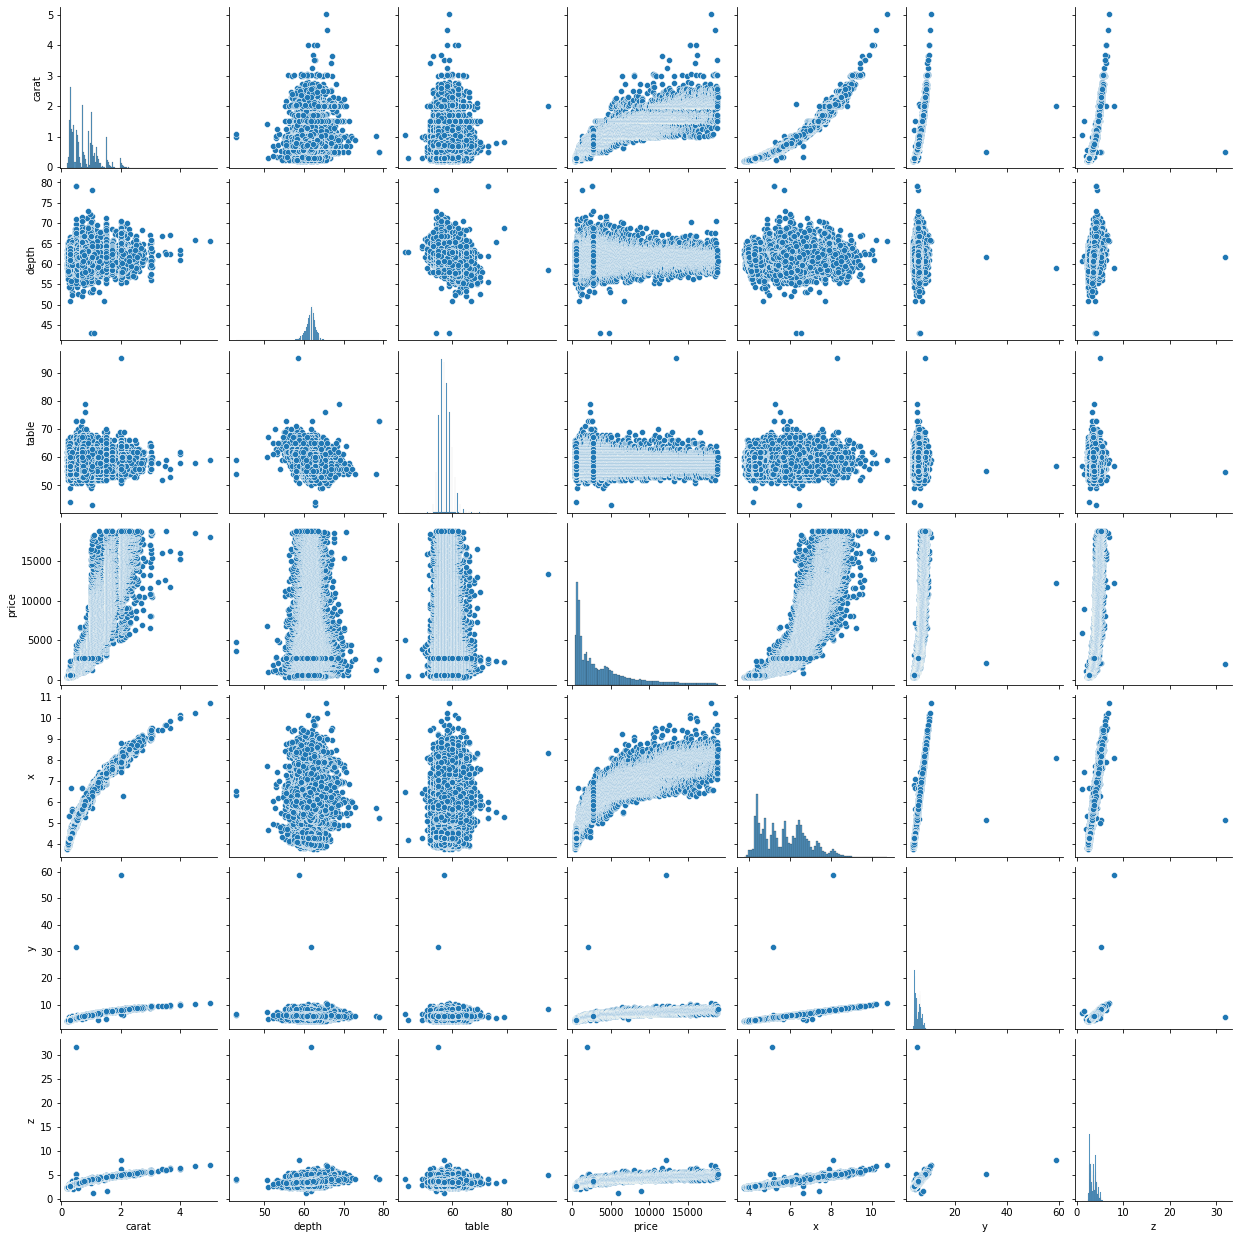

In [15]:
sns.pairplot(df_hist)

In [16]:
corr = df_hist.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.027092,0.181719,0.922176,0.977868,0.951946,0.959690
depth,0.027092,1.000000,-0.297033,-0.012135,-0.025740,-0.029781,0.094321
table,0.181719,-0.297033,1.000000,0.127936,0.196034,0.184010,0.152091
price,0.922176,-0.012135,0.127936,1.000000,0.887895,0.866545,0.867529
x,0.977868,-0.025740,0.196034,0.887895,1.000000,0.972691,0.974121
y,0.951946,-0.029781,0.184010,0.866545,0.972691,1.000000,0.953638
z,0.959690,0.094321,0.152091,0.867529,0.974121,0.953638,1.000000


<ipython-input-17-8e575731a1f4>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

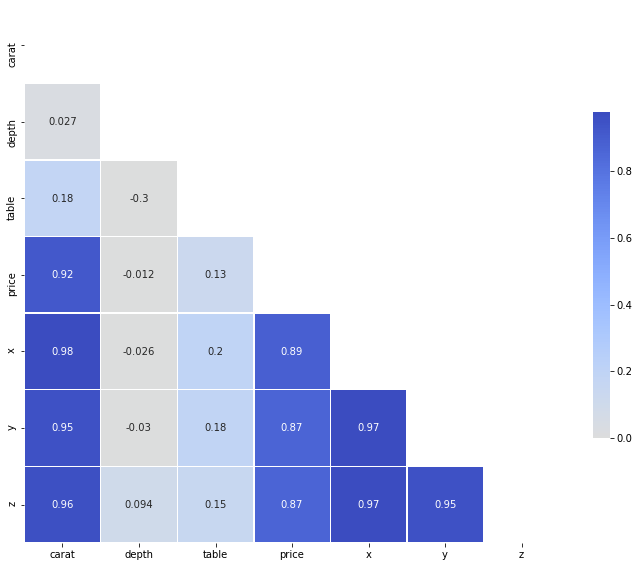

In [17]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm_r', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [18]:
# Price highly correlated to Carat.

# Price highly correlated to Length (x), Width (y) and Depth (z).

# Price inversely related to Depth.

<AxesSubplot:>

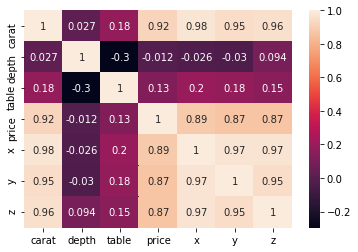

In [19]:
sns.heatmap(corr, annot=True)

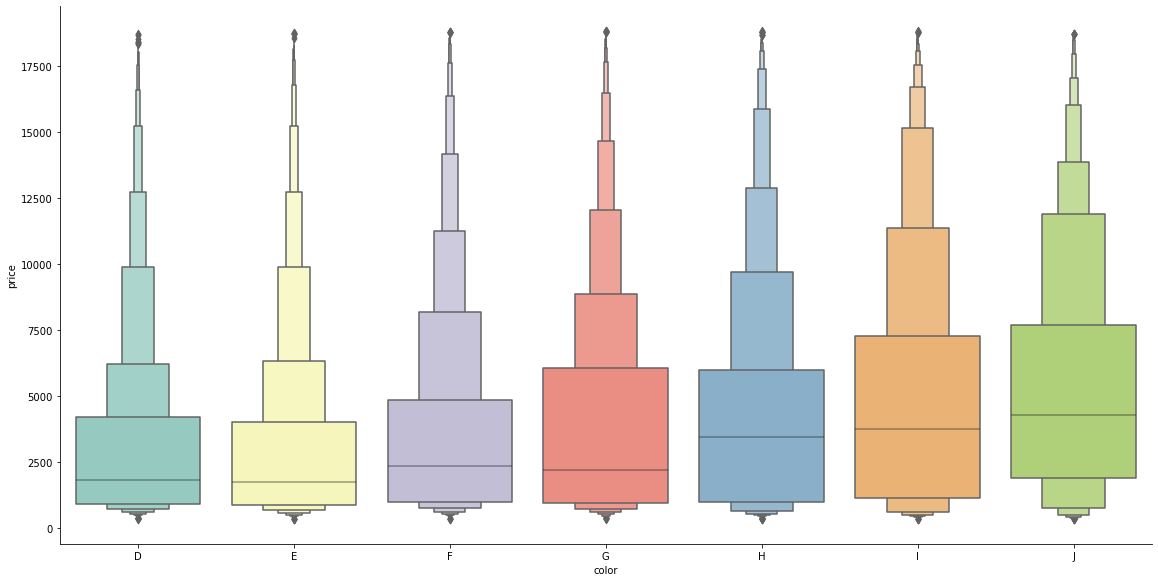

In [20]:
sns.catplot(x='color', y="price", kind="boxen", height=8, aspect=2, palette="Set3", data=df_hist.sort_values('color'));

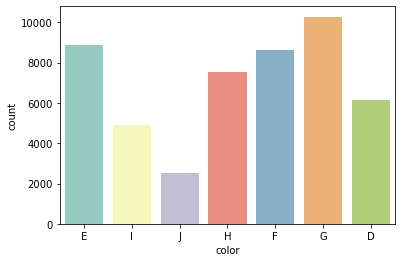

In [21]:
sns.countplot(x='color', palette="Set3", data=df_hist);

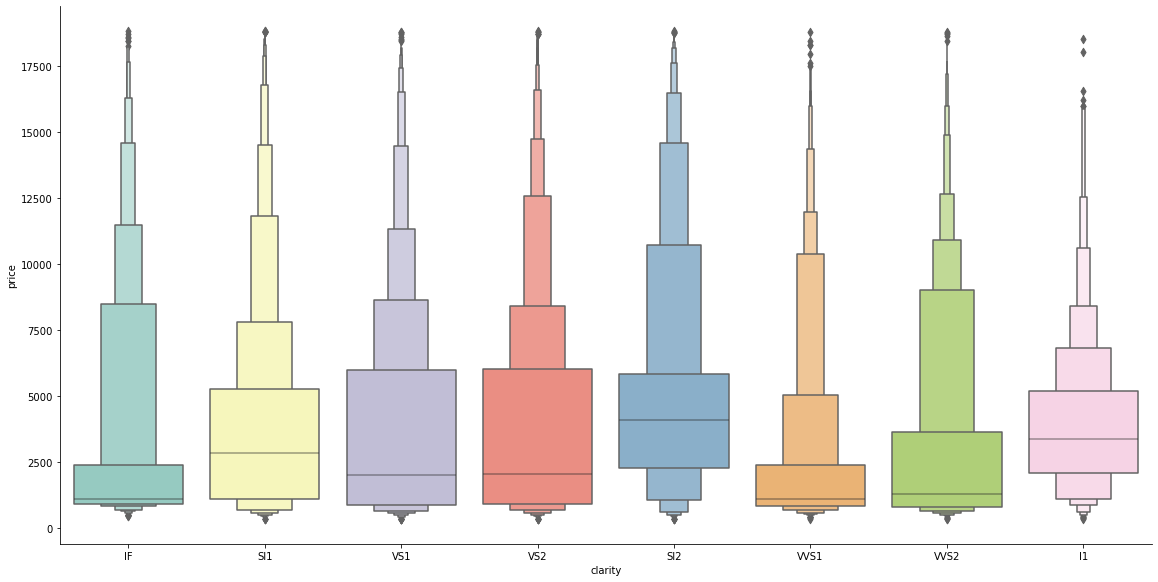

In [22]:
sns.catplot(x='clarity', y="price", kind="boxen", height=8, aspect=2, palette="Set3", data=df_hist.sort_values('color'));

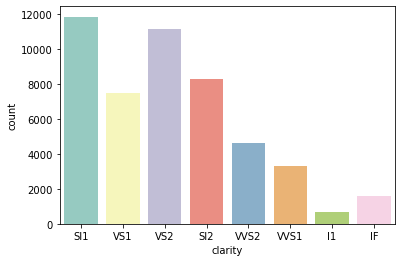

In [23]:
sns.countplot(x='clarity', palette="Set3", data=df_hist);

In [24]:
# create a new column to assign numbers to the values

In [25]:
cut_quality = {'Fair': 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
color_quality = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_quality = {'I1':1, 'SI2' : 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

In [26]:
df_hist['cut_quality'] = df_hist['cut'].apply(lambda x: cut_quality[x])
df_hist['color_quality'] = df_hist['color'].apply(lambda x: color_quality[x])
df_hist['clarity_quality'] = df_hist['clarity'].apply(lambda x: clarity_quality[x])

<AxesSubplot:xlabel='carat', ylabel='price'>

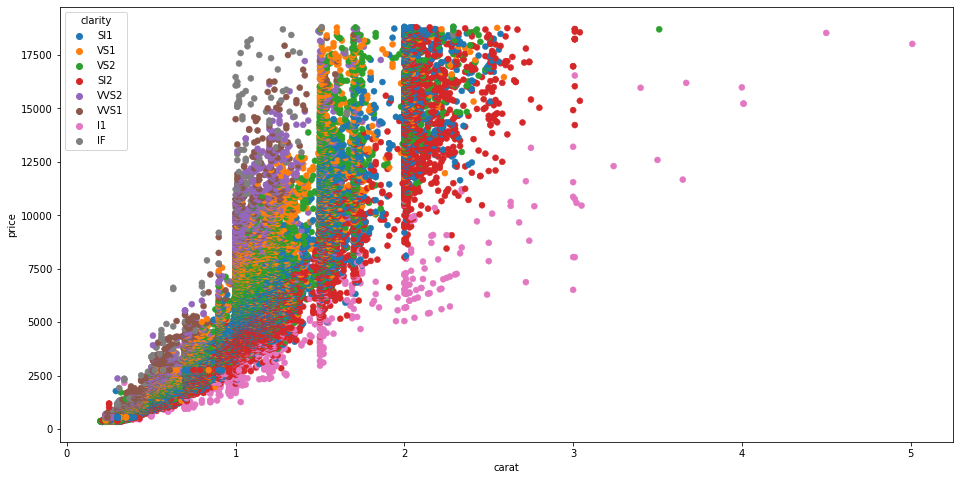

In [27]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist, x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

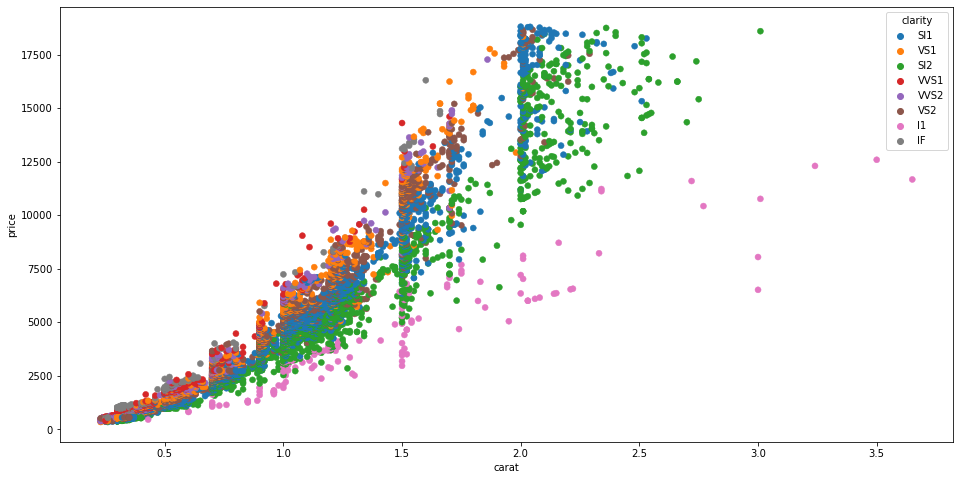

In [28]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['color']=='H'], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

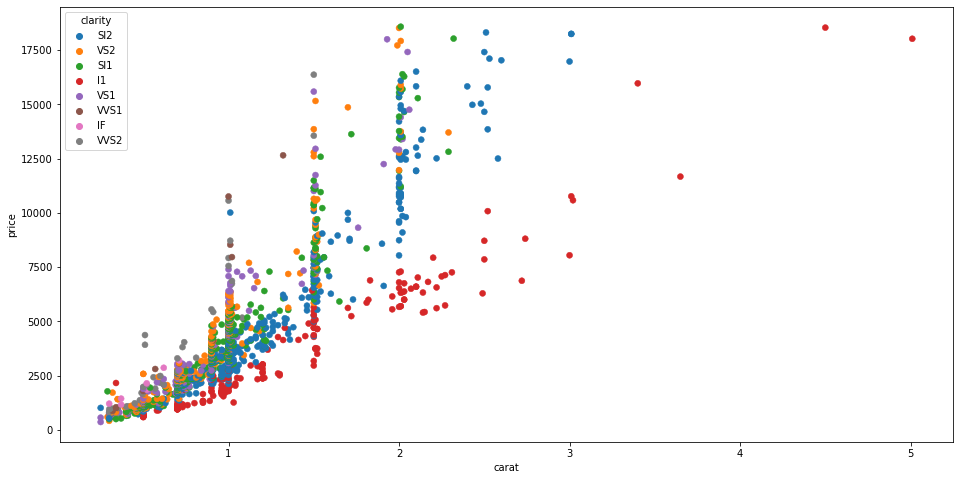

In [29]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==1], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

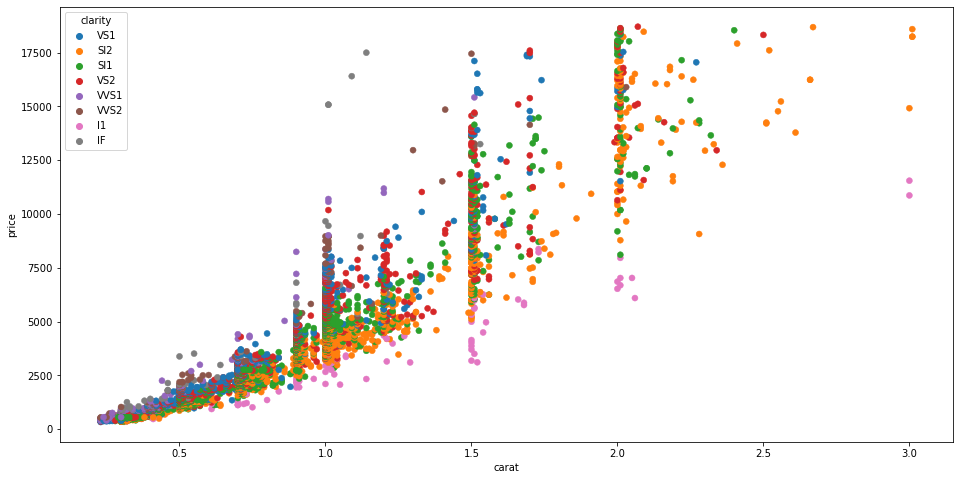

In [30]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==2], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

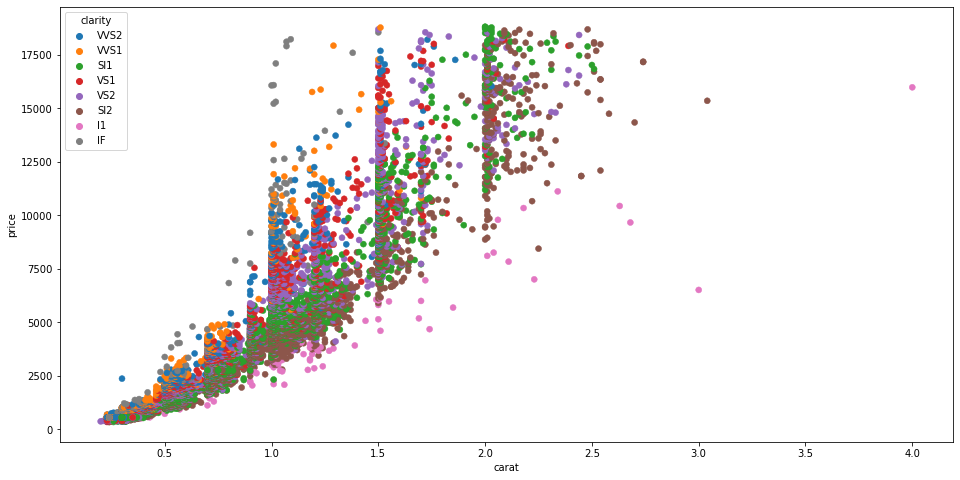

In [31]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==3], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

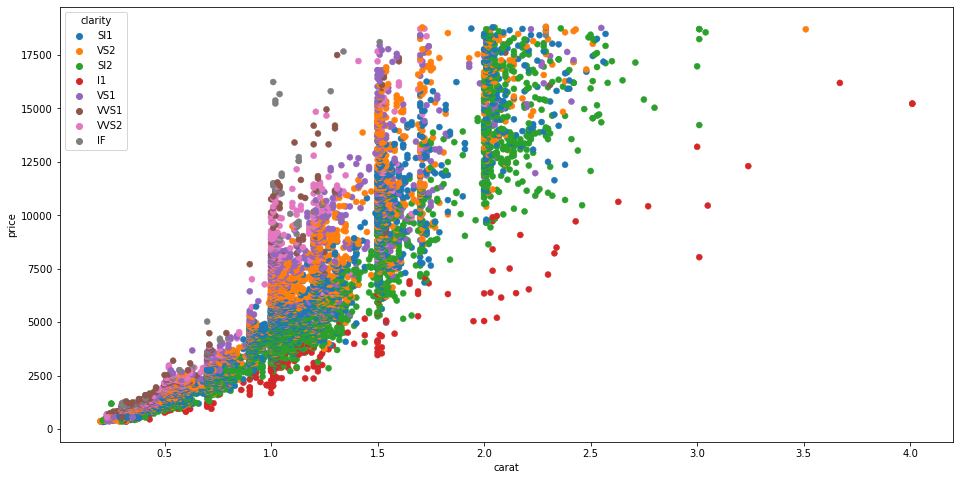

In [58]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==4], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

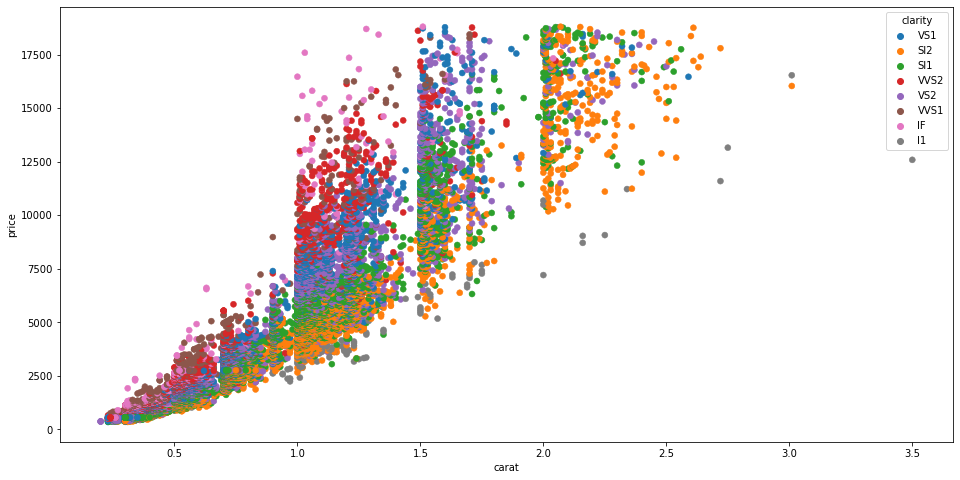

In [59]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==5], x='carat', y='price', hue='clarity', edgecolor = None)

<AxesSubplot:xlabel='carat', ylabel='price'>

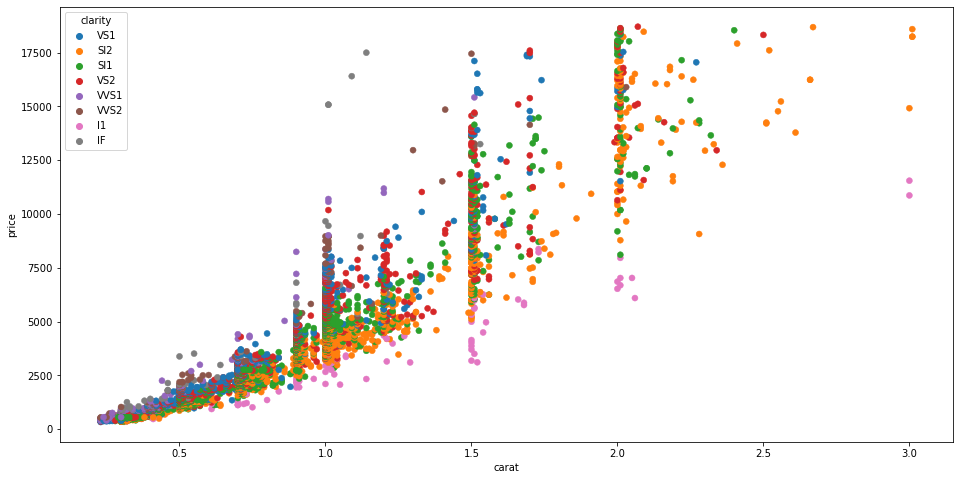

In [34]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_hist[df_hist['cut_quality']==2], x='carat', y='price', hue='clarity', edgecolor = None)

In [35]:
# linear regression

In [60]:
model = LinearRegression()

In [61]:
model

LinearRegression()

In [62]:
# feature – must be in a df format
X = df_hist[['carat', 'depth', 'table', 'cut_quality', 'color_quality', 'clarity_quality']]

# target – must be in a Series format
y = df_hist['price']

In [63]:
X.head()

,carat,depth,table,cut_quality,color_quality,clarity_quality
0,0.21,59.8,61.0,4,6,3
1,0.23,56.9,65.0,2,6,5
2,0.29,62.4,58.0,4,2,4
3,0.31,63.3,58.0,2,1,2
4,0.24,62.8,57.0,3,1,5


In [64]:
y.head()

0    326
1    327
2    334
3    335
4    336
Name: price, dtype: int64

In [65]:
model.fit(X, y)

LinearRegression()

In [66]:
X.max()

carat               5.01
depth              79.00
table              95.00
cut_quality         5.00
color_quality       7.00
clarity_quality     7.00
dtype: float64

In [67]:
X

,carat,depth,table,cut_quality,color_quality,clarity_quality
0,0.21,59.8,61.0,4,6,3
1,0.23,56.9,65.0,2,6,5
2,0.29,62.4,58.0,4,2,4
3,0.31,63.3,58.0,2,1,2
4,0.24,62.8,57.0,3,1,5
...,...,...,...,...,...,...
48917,0.72,62.7,59.0,4,7,3
48918,0.72,60.8,57.0,5,7,3
48919,0.72,63.1,55.0,2,7,3
48920,0.70,62.8,60.0,3,7,3


In [68]:
y_pred = model.predict(X)
y_pred

array([-1283.06278371,   -21.8224265 , -1261.29533622, ...,
        3305.06473293,  3135.50286751,  3317.47639777])

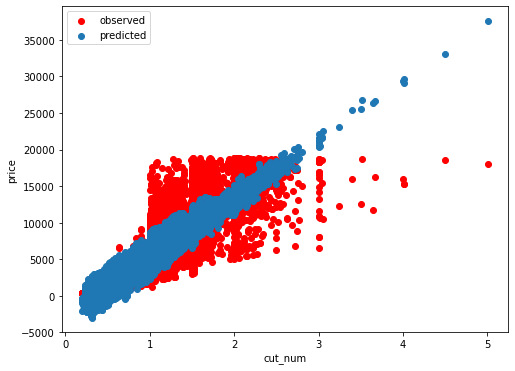

In [69]:
plt.figure(figsize=(8,6))
plt.xlabel('cut_num')
plt.ylabel('price')
plt.scatter(X['carat'], y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X['carat'], y_pred, label='predicted')


plt.legend();

In [70]:
np.sqrt(mean_squared_error(y, model.predict(X)))

1214.9617269560088

In [71]:
# read rick diamonds .csv file and transform into a data frame

In [72]:
df_rick = pd.read_csv('rick_diamonds.csv', sep=',')

In [73]:
df_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [74]:
len(df_rick)

5000

In [25]:
cut_quality = {'Fair': 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}
color_quality = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_quality = {'I1':1, 'SI2' : 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

In [78]:
df_rick['cut_quality'] = df_rick['cut'].apply(lambda x: cut_quality[x])
df_rick['color_quality'] = df_rick['color'].apply(lambda x: color_quality[x])
df_rick['clarity_quality'] = df_rick['clarity'].apply(lambda x: clarity_quality[x])

In [79]:
df_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2


In [80]:
X_pred = df_rick[['carat', 'depth', 'table', 'cut_quality', 'color_quality', 'clarity_quality']]

In [81]:
price_pred = model.predict(X_pred)

In [84]:
df_rick['price_predicted'] = pd.Series(price_pred)

In [85]:
df_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_quality,color_quality,clarity_quality,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2,3093.744839
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4,280.773750
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4,1285.186696
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,7392.179629
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2,15811.791746


In [86]:
diamonds_pred = df_rick.drop(columns=['cut_quality', 'color_quality', 'clarity_quality'])

In [87]:
diamonds_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3093.744839
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,280.773750
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1285.186696
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7392.179629
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,15811.791746


In [88]:
diamonds_pred.to_csv('diamonds_pred.csv', sep=',')